This example derived from Women in Data Science (WiDS) Datathon 2021


https://www.kaggle.com/competitions/widsdatathon2021/overview


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model, preprocessing

In [28]:
import matplotlib.pyplot as plt

In [29]:
data = pd.read_csv("widsdatathon2021/TrainingWiDS2021.csv")

In [30]:
data.head()

,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,...,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,1,214826,118,68.0,22.732803,0,Caucasian,M,180.3,Floor,...,NaN,NaN,0,0,0,0,0,0,0,1
1,2,246060,81,77.0,27.421875,0,Caucasian,F,160.0,Floor,...,51.0,51.0,0,0,0,0,0,0,0,1
2,3,276985,118,25.0,31.952749,0,Caucasian,F,172.7,Emergency Department,...,NaN,NaN,0,0,0,0,0,0,0,0
3,4,262220,118,81.0,22.635548,1,Caucasian,F,165.1,Operating Room,...,337.0,337.0,0,0,0,0,0,0,0,0
4,5,201746,33,19.0,NaN,0,Caucasian,M,188.0,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0


In [31]:
data.shape

(130157, 181)

In [32]:
print(data.columns)

Index(['Unnamed: 0', 'encounter_id', 'hospital_id', 'age', 'bmi',
       'elective_surgery', 'ethnicity', 'gender', 'height',
       'hospital_admit_source',
       ...
       'h1_pao2fio2ratio_max', 'h1_pao2fio2ratio_min', 'aids', 'cirrhosis',
       'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'diabetes_mellitus'],
      dtype='object', length=181)


In [ ]:
#our task here is to use a list of predictors to identify if a patient had diabetes prior to ICU transfer
#Please see the challenge here


In [ ]:
# we will keep the model simple for now
# The predictors that we will use are
# age, bmi, ethnicity, gender, height

In [13]:
# A few things before we start. We need to make sure that some of the variables that are not numeric 
# we will need to transform the gender and ethnicity variables
# all other should be okay (they may need to be scaled though)

In [33]:
# label encoder will convert text categorical variables into integers needed for analysiss
labelencoder = preprocessing.LabelEncoder()

In [34]:
data["eth_enc"] = labelencoder.fit_transform(list(data["ethnicity"]))
data["gender_enc"] = labelencoder.fit_transform(list(data["gender"]))

In [35]:
data.eth_enc

0         2
1         2
2         2
3         2
4         2
         ..
130152    2
130153    2
130154    0
130155    2
130156    0
Name: eth_enc, Length: 130157, dtype: int64

In [36]:
data.gender_enc

0         1
1         0
2         0
3         0
4         1
         ..
130152    1
130153    0
130154    1
130155    1
130156    1
Name: gender_enc, Length: 130157, dtype: int64

In [37]:
#Now lets look at the distribution of age, bmi and height and see if they need to be transformed and then standardize them

In [38]:
list_var = ["age", "bmi", "height"]

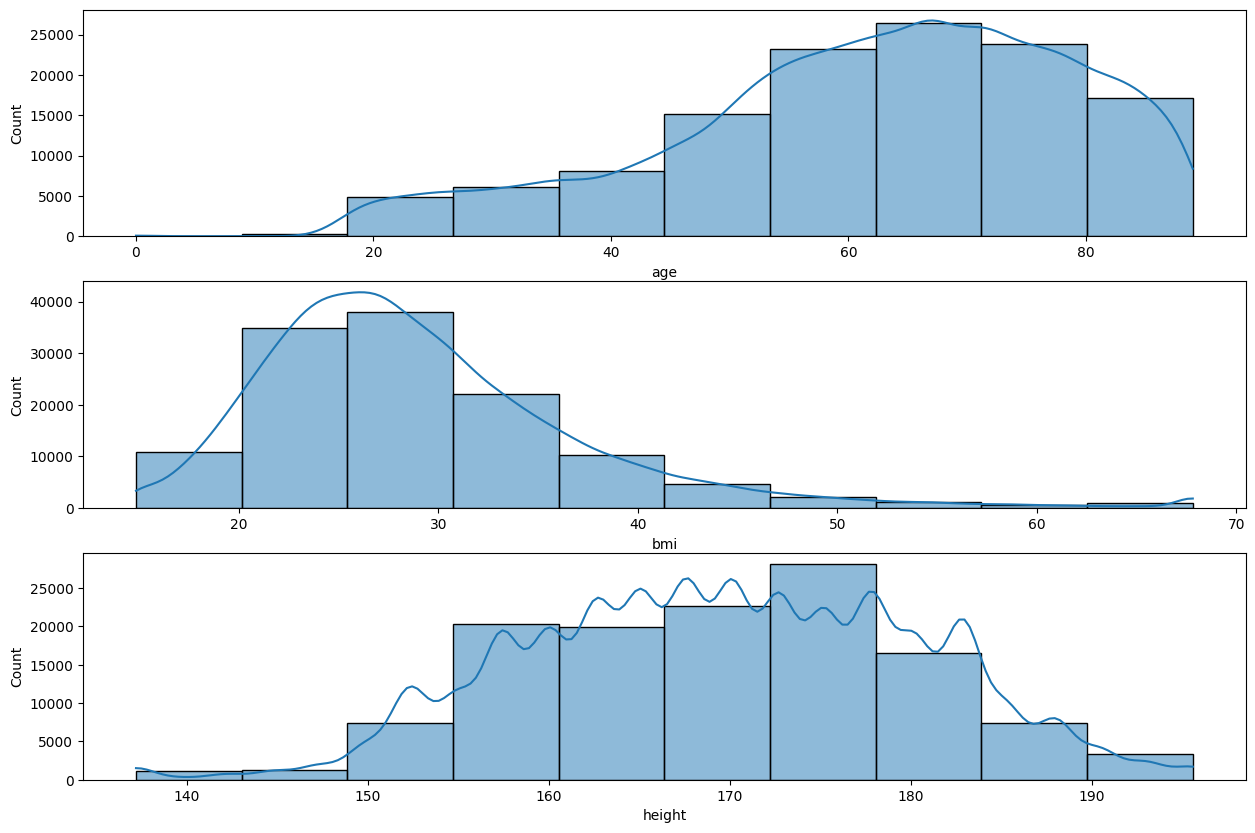

In [40]:
fig, axs = plt.subplots(3,1, figsize=(15,10))
for i, var in enumerate(list_var):
    sns.histplot(data[var], kde=True, bins=10, ax=axs[i])

In [41]:
data.height.describe()

count    128080.000000
mean        169.607219
std          10.833085
min         137.200000
25%         162.500000
50%         170.100000
75%         177.800000
max         195.590000
Name: height, dtype: float64

In [ ]:
# Notice there are a few things that we will need to fix
# Lets restrict the analysis to people between the ages 20 to 65
# Remove ID where bmi is zero or BMI is in the last category which seems to be incorrect

In [42]:
data_subset = data[(data.age>=20) & (data.age<65)]

In [43]:
data_subset.bmi.describe()

count    60064.000000
mean        30.195328
std          8.994725
min         14.844926
25%         24.093801
50%         28.474420
75%         34.265558
max         67.814990
Name: bmi, dtype: float64

In [44]:
data_subset['bmi'] = data_subset['bmi'].replace({0: np.nan})
data_subset.loc[data_subset['bmi'] >65, 'bmi'] = np.nan

C:\Users\sshres07\AppData\Local\Temp\ipykernel_11844\725313159.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['bmi'] = data_subset['bmi'].replace({0: np.nan})


<Axes: xlabel='age', ylabel='Count'>

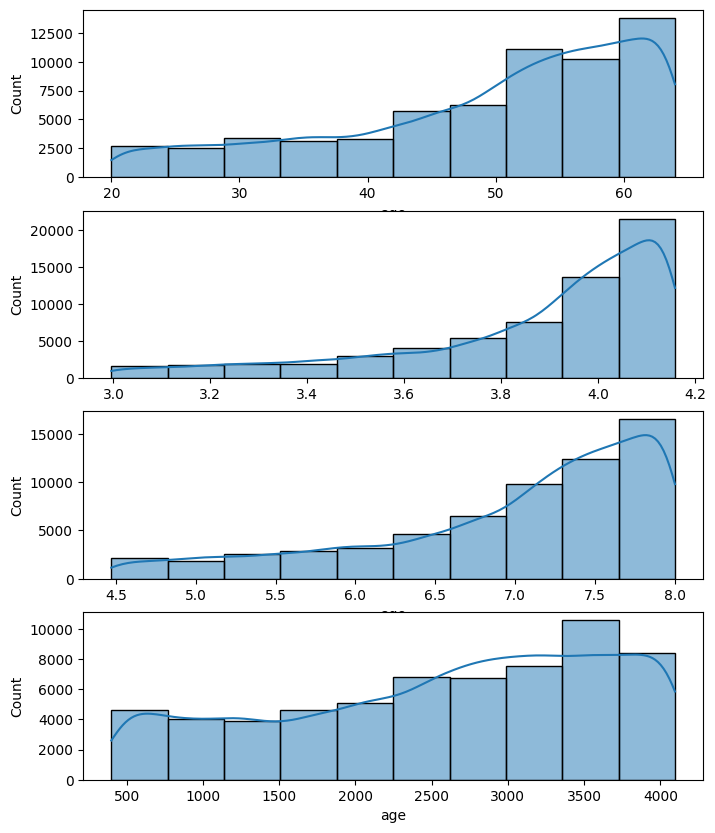

In [45]:
# lets apply transformations
fig, axs = plt.subplots(4,1, figsize=(8,10))
sns.histplot(data_subset.age, kde=True, ax=axs[0], bins=10)
sns.histplot(np.log(data_subset.age), kde=True, ax=axs[1], bins=10)
sns.histplot(np.sqrt(data_subset.age), kde=True, ax=axs[2], bins=10)
sns.histplot(np.square(data_subset.age), kde=True, ax=axs[3], bins=10)


In [ ]:
# Seems we cannot do much with age

<Axes: xlabel='bmi', ylabel='Count'>

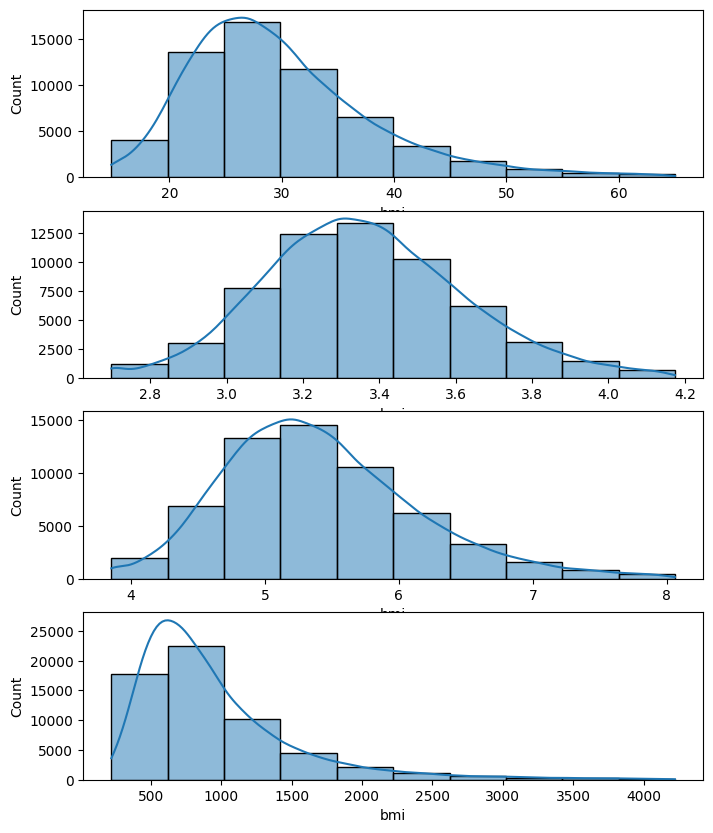

In [46]:
fig, axs = plt.subplots(4,1, figsize=(8,10))
sns.histplot(data_subset.bmi, kde=True, ax=axs[0], bins=10)
sns.histplot(np.log(data_subset.bmi), kde=True, ax=axs[1], bins=10)
sns.histplot(np.sqrt(data_subset.bmi), kde=True, ax=axs[2], bins=10)
sns.histplot(np.square(data_subset.bmi), kde=True, ax=axs[3], bins=10)


In [47]:
# Log transformation for BMI

<Axes: xlabel='height', ylabel='Count'>

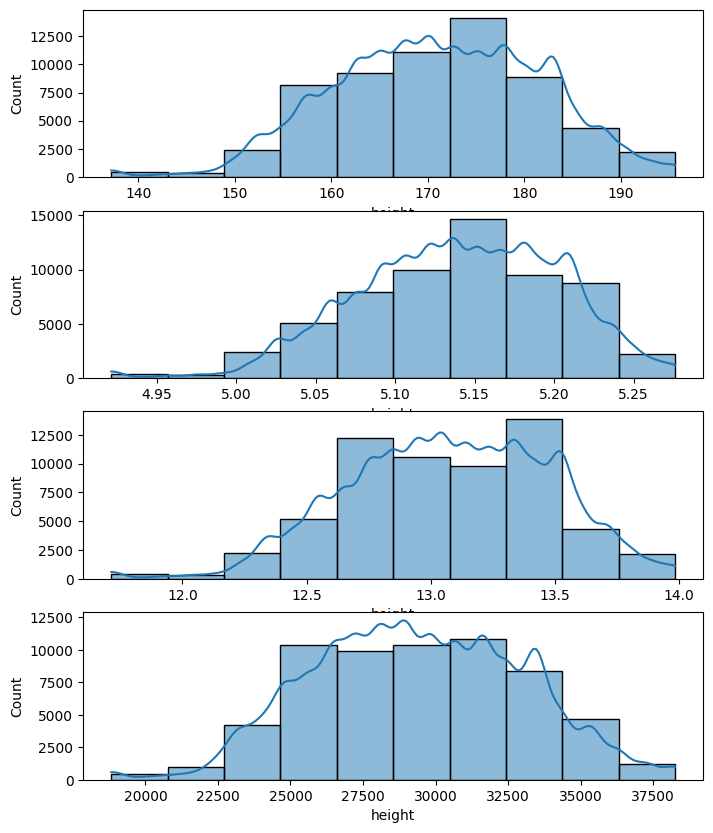

In [48]:
fig, axs = plt.subplots(4,1, figsize=(8,10))
sns.histplot(data_subset.height, kde=True, ax=axs[0], bins=10)
sns.histplot(np.log(data_subset.height), kde=True, ax=axs[1], bins=10)
sns.histplot(np.sqrt(data_subset.height), kde=True, ax=axs[2], bins=10)
sns.histplot(np.square(data_subset.height), kde=True, ax=axs[3], bins=10)


In [ ]:
# We dont need to modify this variable either

In [50]:
data_subset["log_bmi"] = np.log(data_subset["bmi"])

C:\Users\sshres07\AppData\Local\Temp\ipykernel_11844\2908758685.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset["log_bmi"] = np.log(data_subset["bmi"])


In [51]:
data_subset.head()

,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,...,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus,eth_enc,gender_enc,log_bmi
2,3,276985,118,25.0,31.952749,0,Caucasian,F,172.7,Emergency Department,...,0,0,0,0,0,0,0,2,0,3.464258
6,7,195124,83,59.0,57.451002,0,Caucasian,F,165.1,Operating Room,...,0,0,0,0,0,0,1,2,0,4.050932
8,9,271041,118,45.0,NaN,0,Caucasian,M,170.2,Other Hospital,...,0,0,0,0,0,0,0,2,1,NaN
9,10,238874,118,50.0,25.707702,0,NaN,M,175.3,Direct Admit,...,0,0,0,0,0,0,0,6,1,3.246791
12,13,203469,118,48.0,NaN,0,Caucasian,M,175.3,Emergency Department,...,0,0,0,0,0,0,0,2,1,NaN


In [52]:
data_subset.shape

(62258, 184)

In [53]:
# now lets just retain the variables that we need

In [54]:
data_subset_2 = data_subset[["age", "log_bmi", "height", "eth_enc", "gender_enc", "diabetes_mellitus"]]

In [55]:
data_subset_2.head()

,age,log_bmi,height,eth_enc,gender_enc,diabetes_mellitus
2,25.0,3.464258,172.7,2,0,0
6,59.0,4.050932,165.1,2,0,1
8,45.0,NaN,170.2,2,1,0
9,50.0,3.246791,175.3,6,1,0
12,48.0,NaN,175.3,2,1,0


In [57]:
#lets check for NA
data_subset_2.isna().sum()

age                     0
log_bmi              2747
height               1051
eth_enc                 0
gender_enc              0
diabetes_mellitus       0
dtype: int64

In [ ]:
# So there is quite a long of missing for log_bmi and height (its because of what we did to the values that we thought were outliers)
# Now we can either drop these
# Or replace them with mean
# There is advantages and disadvantages to both
# For now we will replace it with the mean

In [58]:
data_subset_2 = data_subset_2.fillna(data_subset_2.mean())

In [59]:
# okay now we dont have any missing. 
data_subset_2.isna().sum()

age                  0
log_bmi              0
height               0
eth_enc              0
gender_enc           0
diabetes_mellitus    0
dtype: int64

In [ ]:
# now lets standardized scale the data to 0 and 1 )

In [60]:
data_subset_2["age_std"] = (data_subset_2.age - data_subset_2.age.min()) - (data_subset_2.age.max() - data_subset_2.age.min())

In [61]:
data_subset_2["logbmi_std"] = (data_subset_2.log_bmi - data_subset_2.log_bmi.min()) - (data_subset_2.log_bmi.max() - data_subset_2.log_bmi.min())

In [62]:
data_subset_2["height_std"] = (data_subset_2.height - data_subset_2.height.min()) - (data_subset_2.height.max() - data_subset_2.height.min())

In [63]:
outcome = "diabetes_mellitus"
var_list = ["age_std", "logbmi_std", "height_std", "gender_enc", "eth_enc"]

In [79]:
X = np.array(data_subset_2[var_list])

In [82]:
y = np.array(data_subset_2[outcome])

In [84]:
import sklearn

In [85]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y, test_size=0.2)

In [94]:
model = KNeighborsClassifier(n_neighbors=15)

In [95]:
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [96]:
acc = model.score(x_test, y_test)

In [97]:
print(acc)

0.8016382910375843


In [98]:
from sklearn.metrics import confusion_matrix

In [99]:
y_pred = model.predict(x_test)

In [100]:
confusion_matrix(y_test, y_pred)

array([[9928,   99],
       [2371,   54]], dtype=int64)

In [101]:
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
plt.figure(figsize=(7,5))

<Figure size 700x500 with 0 Axes>

<Figure size 700x500 with 0 Axes>

Text(50.722222222222214, 0.5, 'observed')

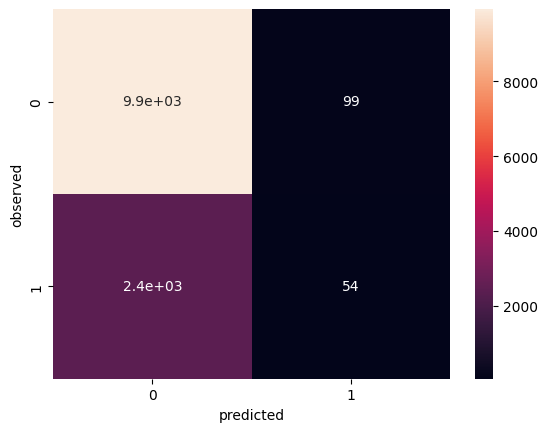

In [103]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel("predicted")
plt.ylabel("observed")